## Telcom  Customer churn  Prediction

## Business Understanding

### 1. Project Description/Background

> Given the large number of customers the Telecommunication industry service providers have and the competitive nature of their products/services, the rate at which customers can stop using one provider's product/service in preference for another provider is high. Moreover, the providers can't afford the time to have dedicated attention to each client so that they know when they are dissatified with their products/services and the cost of acquiring a new client as compared to maintaining an existing one is very high.
>
> Therefore, Telcos have a pressing need to use their data from customer interactions to predict with high accuracy the customers that are likely to switch from using their products/services so that they can invest in mitigation startegies to maintain those clients, thereby, increasing their market position and profits.
>
> In this project we utilize the Vodafone Corporation data and Machine Learning models to predict with high accuracy the likelihood of a customer stopping the use of its products/services. We will also identify the factors affecting customer churn and suggest strategies the Telco can deploy to retain a high percentage of its customers. 

#### 2. Features
There are 17 categorical features:

> - CustomerID: Unique identifier for each customer
> - gender: Whether the customer is a male or a female
> - SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
> - Partner: Whether the customer has a partner or not (Yes, No)
> - Dependent: Whether the customer has dependents or not (Yes, No)
> - PhoneService: Whether the customer has a phone service or not (Yes, No)
> - MultipeLines: Whether the customer has multiple lines (Yes, No, No phone service)
> - InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
> - OnlineSecurity: Whether the customer has online security (Yes, No, No internet service)
> - OnlineBackup: Whether the customer has an online backup (Yes, No, No internet service)
> - DeviceProtection: Whether the customer has device protection (Yes, No, No internet service)
> - TechSupport: Whether the customer has tech support (Yes, No, No internet service)
> - StreamingTV: Whether the customer streams TV (Yes, No, No internet service)
> - StreamingMovies: Whether the customer streams movies (Yes, No, No internet service)
> - Contract: The contract term of the customer (Month-to-month, One year, Two years)
> - PaperlessBilling: Whether the customer does paperless Billing or not (True, False)
> - PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

Next, there are 3 numerical features:

> - Tenure: Number of months the customer has stayed with the company
> - MonthlyCharges: The amount charged to the customer monthly
> - TotalCharges: The total amount charged to the customer

Finally, there’s a prediction feature:

> - Churn: Whether the customer churned or not (Yes or No)

These features can also be subdivided into:

**Demographic customer information:**
> gender , SeniorCitizen , Partner , Dependents

**Services that each customer has signed up for:**
> PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies,

**Customer account information:**
> tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges

     Introduction

Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.
For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

    Data Understanding


The data for this project is in a csv format. The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)

    Hypotheses
  Null Hypothesis (H0):

  Alternative Hypothesis (H1):





In [48]:
# importing the necessary libraries
import os, sys
from sqlalchemy import create_engine
import pyodbc # Database Connectivity with  Open Database Connectivity (pyodbc)

from dotenv import dotenv_values # dotenv library to load environment variables
# Lib for data manipulation  analysis and Viz
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick  
%matplotlib inline

warnings.filterwarnings('ignore')

    Load env Variable and assign Login Credentials 

In [49]:
# Load environment variables from .env file 

environment_variables=dotenv_values('.env')
# Get the values for the  login credentials from  the '.env' file

server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

    Test Credectiom Connection

In [50]:

connection = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


    connect to the server

In [51]:
# This will connect to the server with help of pyodbc.

conn = pyodbc.connect(connection)

      Data Loading with login credections

In [52]:
# Load the dataset SQL query
query1 = "Select * from dbo.LP2_Telco_churn_first_3000"

In [53]:
# Read data from the  on dataset 
firstData = pd.read_sql(query1, conn)
secondData = pd.read_csv('dataset\LP2_Telco-churn-second-2000.csv')


Have a peek overview of dataset, by Top 5 records of Data


In [54]:
firstData.tail(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2980,5598-IKHQQ,Female,False,False,False,72,True,True,No,None,...,None,None,None,None,Two year,False,Credit card (automatic),25.450001,1866.449951,False
2981,0397-ZXWQF,Male,False,False,False,67,True,False,No,None,...,None,None,None,None,Two year,False,Bank transfer (automatic),20.500000,1430.949951,False
2982,5266-PFRQK,Male,False,True,True,52,True,False,No,None,...,None,None,None,None,One year,True,Credit card (automatic),20.850000,1071.599976,False
2983,4674-HGNUA,Male,False,True,True,71,True,True,DSL,True,...,True,True,True,True,Two year,False,Credit card (automatic),89.900002,6457.149902,False
2984,6765-MBQNU,Female,False,True,False,26,True,True,No,None,...,None,None,None,None,One year,False,Mailed check,26.000000,684.049988,False
2985,9786-IJYDL,Female,False,False,False,35,True,True,Fiber optic,True,...,True,True,True,True,Two year,True,Mailed check,113.199997,3914.050049,False
2986,1303-SRDOK,Female,False,True,True,55,True,False,Fiber optic,False,...,False,False,False,False,Two year,True,Credit card (automatic),69.050003,3842.600098,False
2987,3769-MHZNV,Female,False,True,True,33,True,False,No,None,...,None,None,None,None,Two year,False,Mailed check,20.100000,670.349976,False
2988,6295-OSINB,Male,False,True,False,72,True,True,Fiber optic,True,...,True,False,True,True,Two year,True,Electronic check,109.650002,7880.250000,None
2989,3308-MHOOC,Male,False,False,True,1,True,False,No,None,...,None,None,None,None,Month-to-month,True,Mailed check,19.200001,19.200001,False


In [55]:
secondData.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
5,2359-QWQUL,Female,0,Yes,No,39,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.70,4134.85,Yes
6,9103-TCIHJ,Female,0,No,No,15,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,55.70,899.8,Yes
7,7407-SUJIZ,Male,0,No,No,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.60,541.5,No
8,9150-KPBJQ,Female,0,No,No,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.65,116.85,No
9,0052-DCKON,Male,0,Yes,No,66,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),115.80,7942.15,No


Check the various attributes of data like shape, columns and datatypes

In [56]:
firstData.shape, secondData.shape

((3000, 21), (2043, 21))

In [57]:
firstData.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [58]:
secondData.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

As the columns are the same for both dataset we can concatinate them 

In [59]:
Data = pd.concat([firstData, secondData], ignore_index=True)

In [60]:
# checking the attributes of the concanated dataset
Data.shape

(5043, 21)

In [61]:
# check the null values in the dataset

Data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [62]:
# checking the datatypes of all columns
Data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [63]:
# check the description statistics of numeric variable
Data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5043.000000,5043.000000,5043.000000
mean,0.162403,32.576641,65.090214
std,0.368857,24.529807,30.068133
min,0.000000,0.000000,18.400000
25%,0.000000,9.000000,35.775000
50%,0.000000,29.000000,70.550003
75%,0.000000,56.000000,90.050003
max,1.000000,72.000000,118.650002


    Insight of Descriptive Statistics

- A notable proportion (16.24%) of customers are Senior Citizens.
- Customer tenure varies widely, with 25% of customers having a tenure of 9 months or less.
- Monthly charges exhibit significant variability, with 25% of customers paying less than USD 35.77 per month.

In [64]:
# lets visualize the distribution of the 'Churn' variable 
Data['Churn'].unique()

array([False, True, None, 'No', 'Yes'], dtype=object)

In [65]:
# Clean the churn columns to have only YES and NO

In [66]:
count_none_values = Data['Churn'].isna().sum()
count_none_values

1

In [67]:
# removes row with 'None' values in the 'Churn' column as ints only 1 row
Data = Data.dropna(subset=['Churn'])
Data['Churn'] = Data['Churn'].replace({True: 'Yes', False: 'No'})

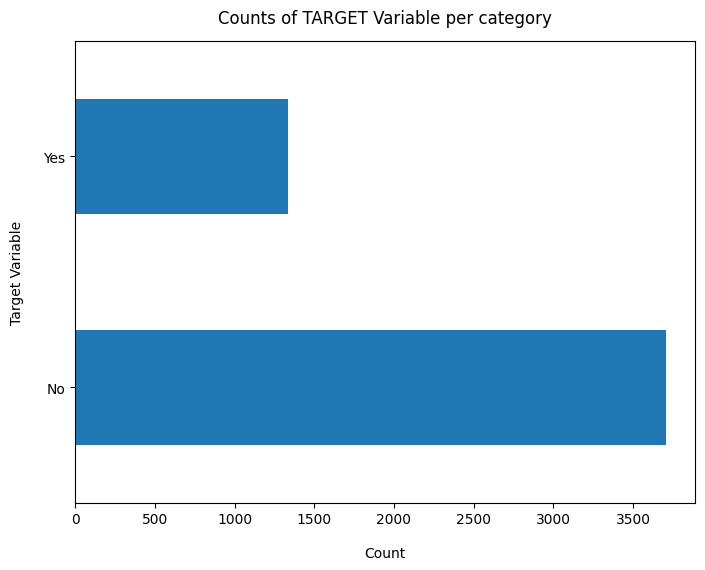

In [68]:

Data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Counts of TARGET Variable per category", y=1.02);


In [69]:
# lets calculates the percentage distribution of unique values in the 'Churn' column
100 * Data['Churn'].value_counts() / len(Data['Churn'])


Churn
No     73.502578
Yes    26.497422
Name: count, dtype: float64

In [70]:
# let the count the unique value in churn values
Data['Churn'].value_counts()

Churn
No     3706
Yes    1336
Name: count, dtype: int64

- The majority of customers fall into the 'No' category, with a count of 3706.
- There is an imbalance in the churn classes, with significantly more customers in the 'No' category compared to the 'Yes' category.

The company might want to focus on improving services or implementing targeted retention strategies for the group of customers more likely to churn.

In [71]:
# Summary of the dataframe
Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5042 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5042 non-null   object 
 1   gender            5042 non-null   object 
 2   SeniorCitizen     5042 non-null   int64  
 3   Partner           5042 non-null   object 
 4   Dependents        5042 non-null   object 
 5   tenure            5042 non-null   int64  
 6   PhoneService      5042 non-null   object 
 7   MultipleLines     4773 non-null   object 
 8   InternetService   5042 non-null   object 
 9   OnlineSecurity    4391 non-null   object 
 10  OnlineBackup      4391 non-null   object 
 11  DeviceProtection  4391 non-null   object 
 12  TechSupport       4391 non-null   object 
 13  StreamingTV       4391 non-null   object 
 14  StreamingMovies   4391 non-null   object 
 15  Contract          5042 non-null   object 
 16  PaperlessBilling  5042 non-null   object 
 17  

    Data Cleaning

In [72]:
# a copy of base data for manupulation & processing
TelcomData = Data.copy()
TelcomData.to_csv('TelcomData.csv', index=False)

Load the backup Data

In [73]:
# data for manupulation & processing
telcomData = pd.read_csv('TelcomData.csv')

In [74]:
# Total Charges should be numeric amount. Let's convert it to numerical data type

telcomData.TotalCharges = pd.to_numeric(telcomData.TotalCharges, errors='coerce')
telcomData.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 0
dtype: int64

In [75]:
telcomData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,Yes


In [83]:
telcomData['OnlineSecurity'].unique()

array(['True', 'False', 'No', 'Yes', 'No internet service'], dtype=object)

let clean the columns and convert a categorical type


In [84]:
# colum Partner
telcomData['Partner'] = telcomData['Partner'].map({'True': 'Yes', 'False': 'No', 'No': 'No', 'Yes': 'Yes'})
# Convert the 'Partner' column to a categorical type
telcomData['Partner'] = pd.Categorical(telcomData['Partner'], categories=['Yes', 'No'], ordered=False)



In [88]:
# colum Deperndent
telcomData['Dependents'] = telcomData['Dependents'].map({'True': 'Yes', 'False': 'No', 'No': 'No', 'Yes': 'Yes'})
# Convert the 'Dependents' column to a categorical type
telcomData['Dependents'] = pd.Categorical(telcomData['Dependents'], categories=['Yes', 'No'], ordered=False)


In [90]:
# colum PhoneService
telcomData['PhoneService'] = telcomData['PhoneService'].map({'True': 'Yes', 'False': 'No', 'No': 'No', 'Yes': 'Yes'})
# Convert the 'PhoneService' column to a categorical type
telcomData['PhoneService'] = pd.Categorical(telcomData['PhoneService'], categories=['Yes', 'No'], ordered=False)


In [92]:
# colum MultipleLines
telcomData['MultipleLines'] = telcomData['MultipleLines'].map({'True': 'Yes', 'False': 'No', 'No': 'No', 'Yes': 'Yes'})
# Convert the 'MultipleLines' column to a categorical type
telcomData['MultipleLines'] = pd.Categorical(telcomData['MultipleLines'], categories=['Yes', 'No', 'No phone service'], ordered=False)


In [94]:

# colum OnlineSecurity
telcomData['OnlineSecurity'] = telcomData['OnlineSecurity'].map({'True': 'Yes', 'False': 'No', 'No': 'No', 'Yes': 'Yes'})
# Convert the 'OnlineSecurity' column to a categorical type
telcomData['OnlineSecurity'] = pd.Categorical(telcomData['OnlineSecurity'], categories=['Yes', 'No', 'No internet service'], ordered=False)



In [97]:
# colum OnlineBackup
telcomData['OnlineBackup'] = telcomData['OnlineBackup'].map({'True': 'Yes', 'False': 'No', 'No': 'No', 'Yes': 'Yes'})
# Convert the 'OnlineBackup' column to a categorical type
telcomData['OnlineBackup'] = pd.Categorical(telcomData['OnlineBackup'], categories=['Yes', 'No', 'No internet service'], ordered=False)


In [99]:
# colum DeviceProtection
telcomData['DeviceProtection'] = telcomData['DeviceProtection'].map({'True': 'Yes', 'False': 'No', 'No': 'No', 'Yes': 'Yes'})
# Convert the 'DeviceProtection' column to a categorical type
telcomData['DeviceProtection'] = pd.Categorical(telcomData['DeviceProtection'], categories=['Yes', 'No', 'No internet service'], ordered=False)


In [101]:
# colum TechSupport
telcomData['TechSupport'] = telcomData['TechSupport'].map({'True': 'Yes', 'False': 'No', 'No': 'No', 'Yes': 'Yes'})
# Convert the 'TechSupport' column to a categorical type
telcomData['TechSupport'] = pd.Categorical(telcomData['TechSupport'], categories=['Yes', 'No', 'No internet service'], ordered=False)

In [102]:
telcomData['TechSupport'].unique()

['No', 'Yes', NaN]
Categories (3, object): ['Yes', 'No', 'No internet service']

In [77]:
# Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.
#Removing missing values 
telcomData.dropna(how = 'any', inplace = True)


Data Exploration

In [78]:
# Remove columns not required for processing
telcomData.drop(columns= ['customerID','tenure'], axis=1, inplace=True)


plot Distributaion of individual predictors by churn

Univariate Analysis

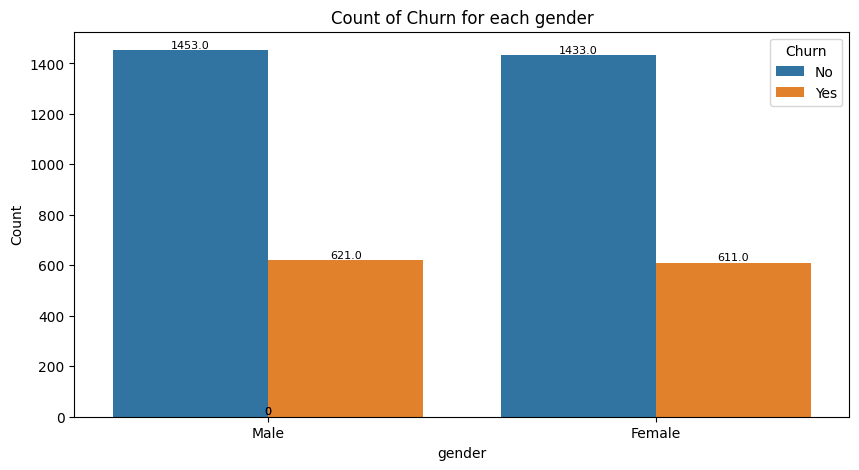

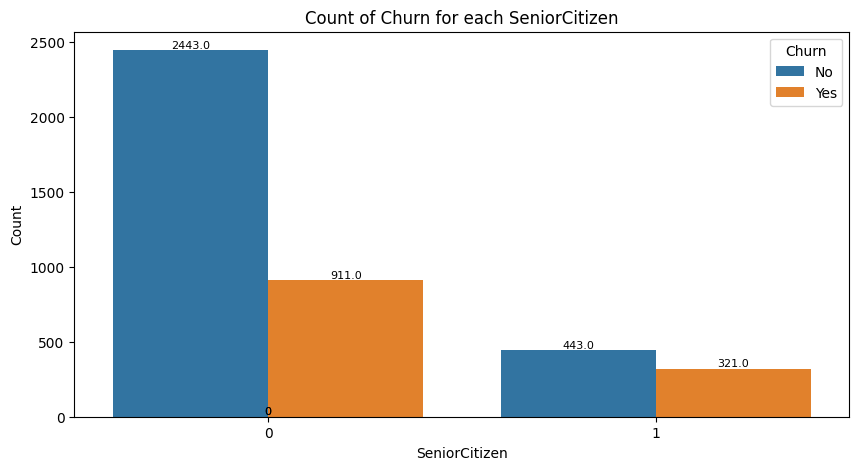

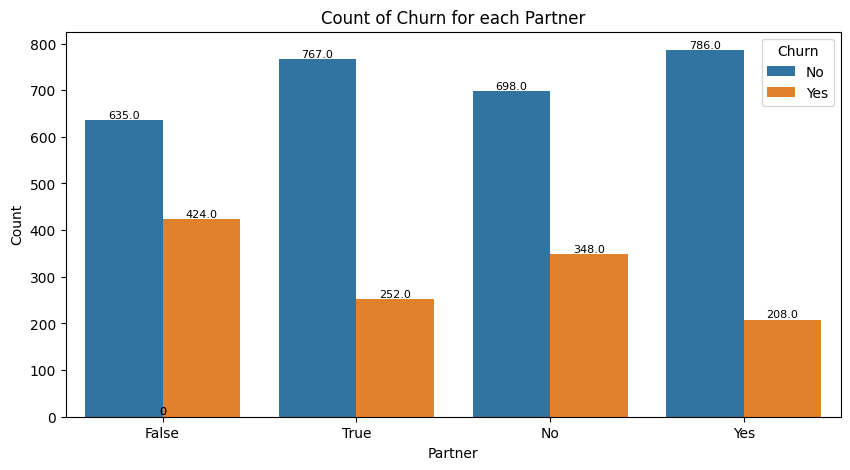

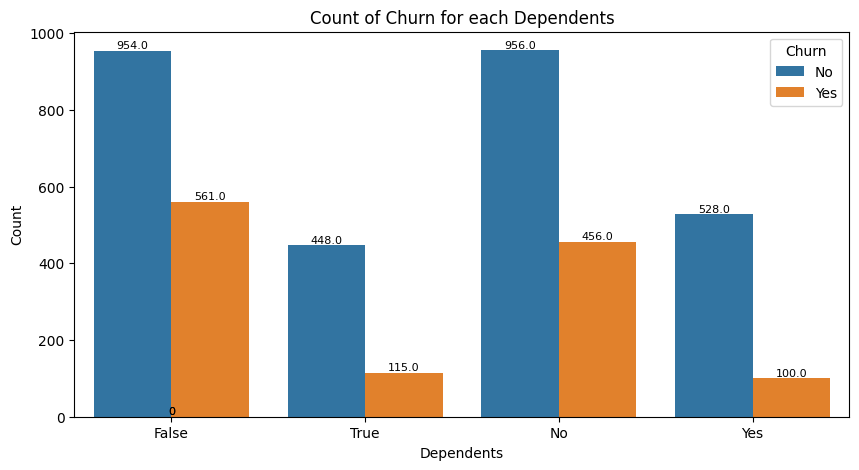

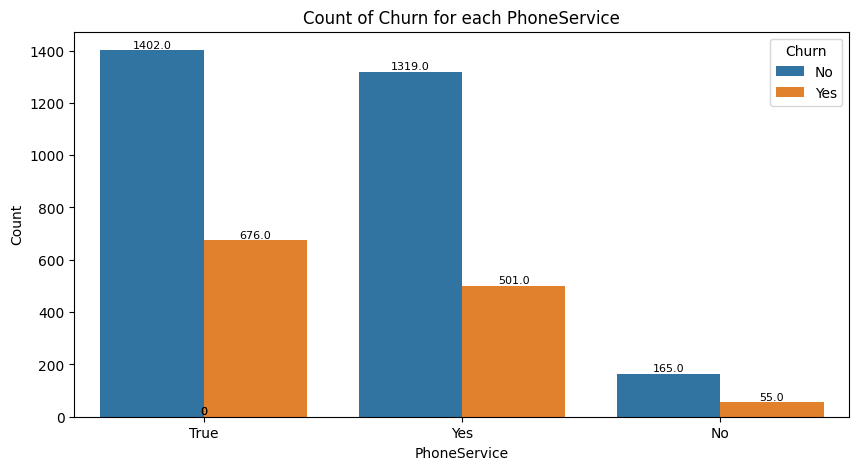

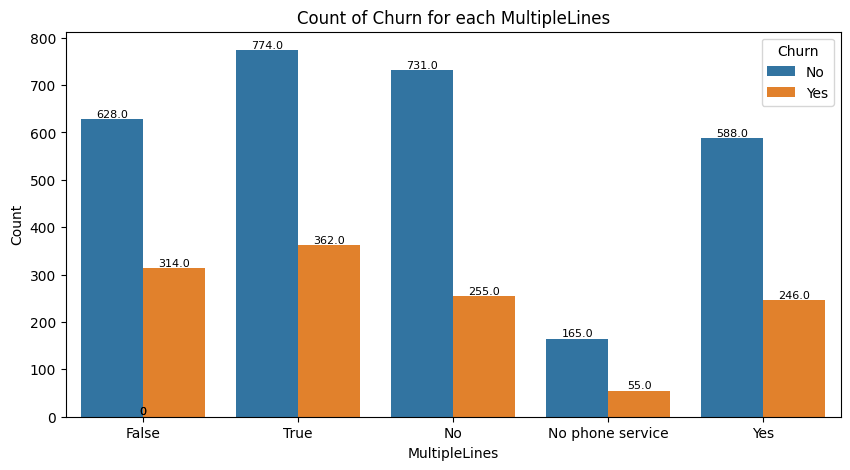

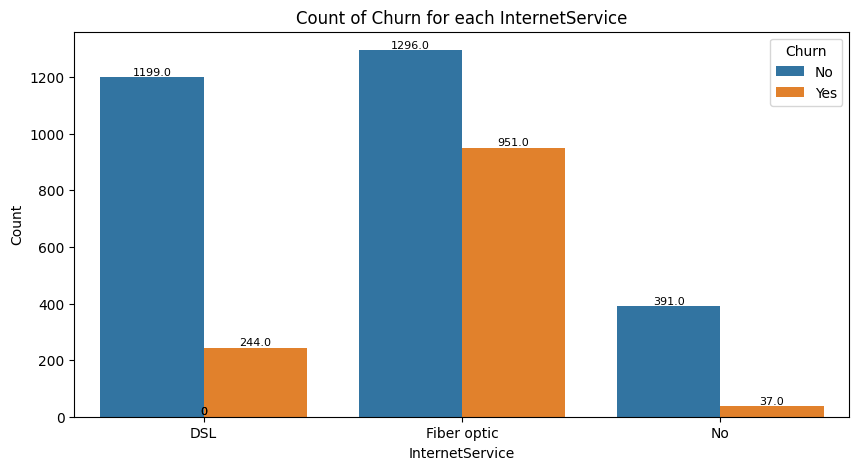

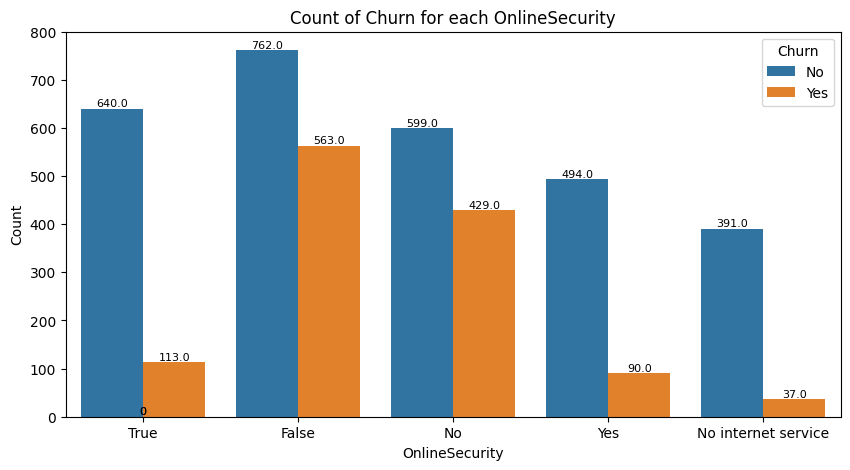

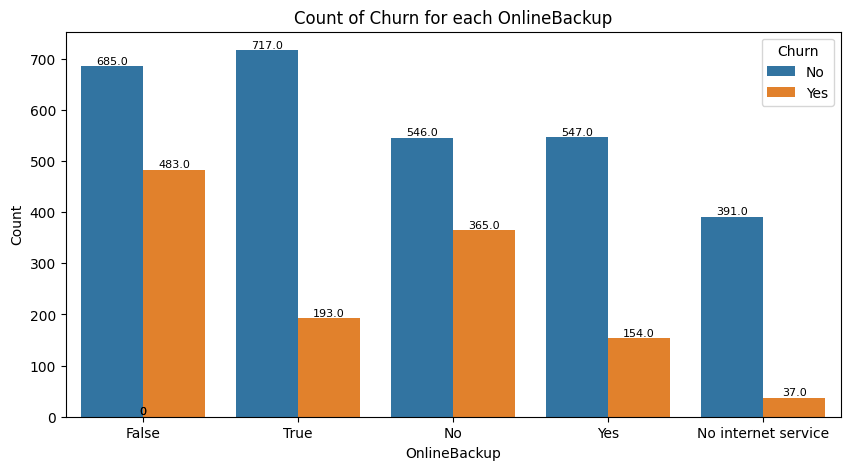

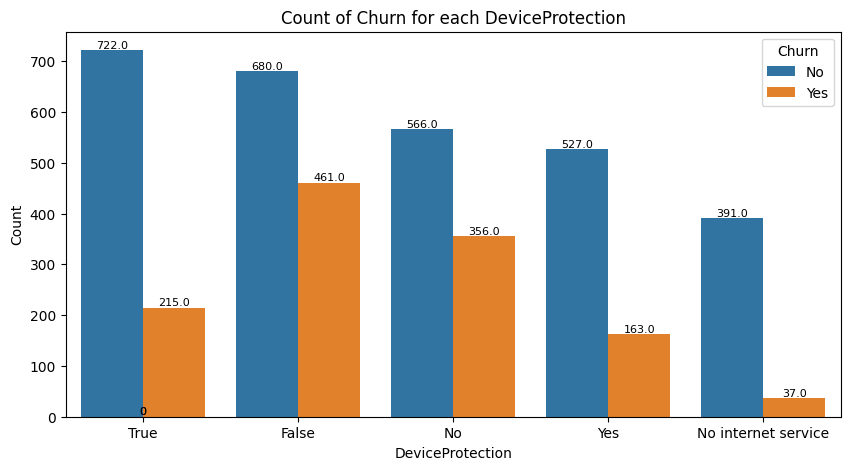

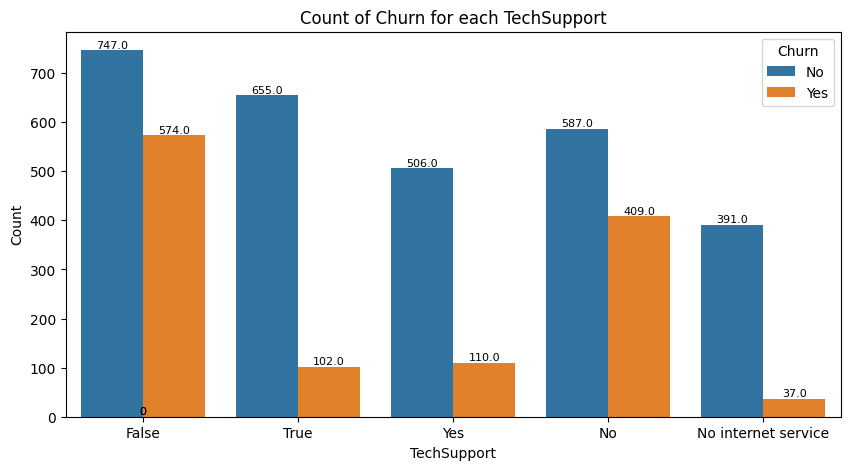

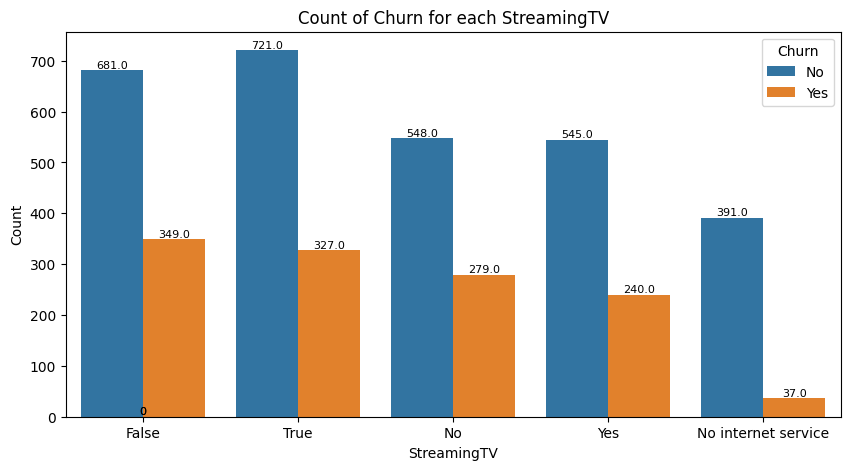

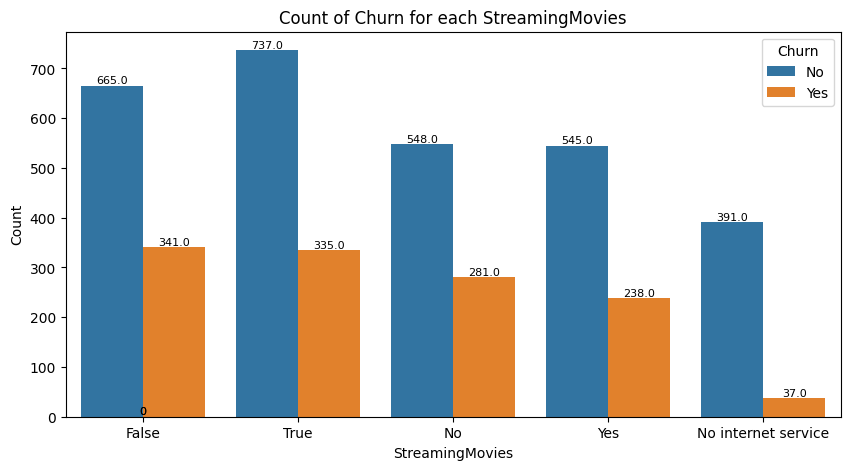

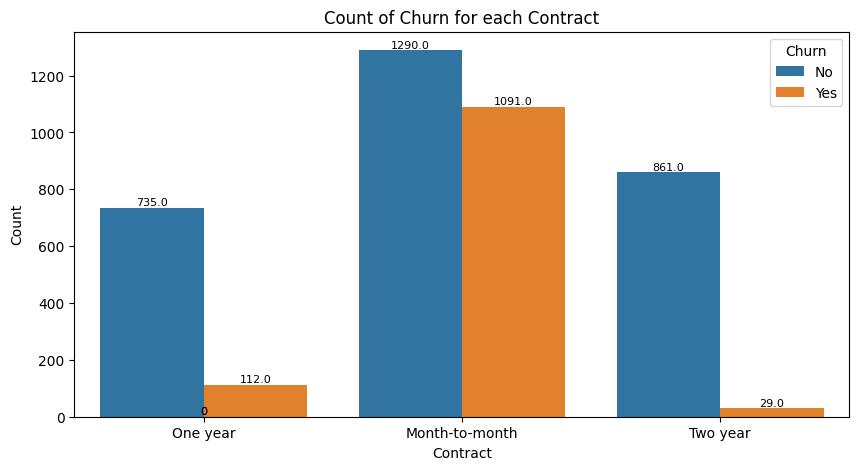

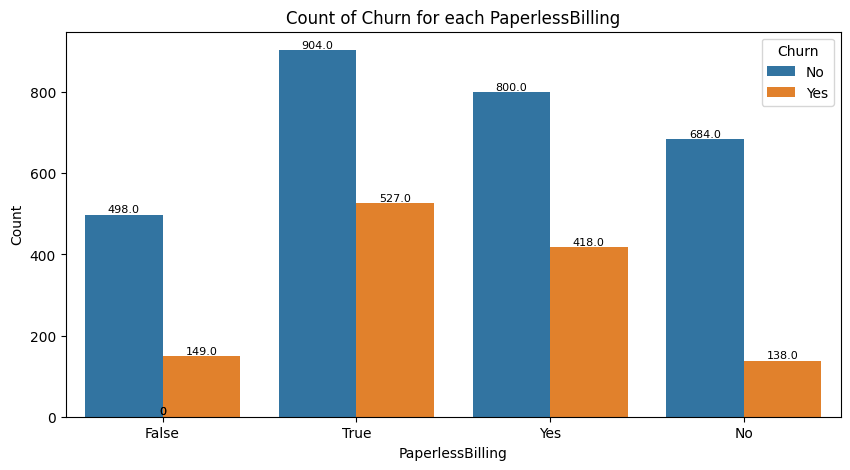

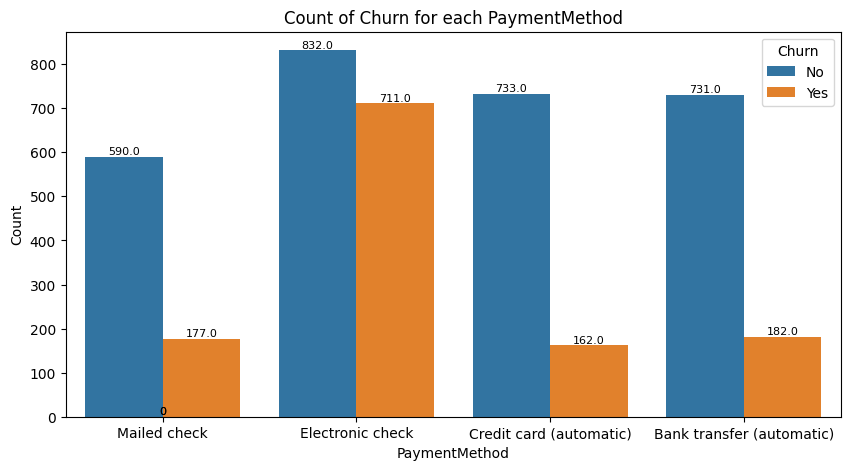

In [79]:

# Get the number of unique values for each predictor
unique_counts = telcomData.nunique()

# Iterate over predictors
for i, predictor in enumerate(telcomData.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i, figsize=(10, 5))  # Adjust figsize as needed
    
    # Create a countplot
    ax = sns.countplot(data=telcomData, x=predictor, hue='Churn')
    
    # Annotate each bar with its count
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

    # Set labels and title
    plt.xlabel(predictor)
    plt.ylabel('Count')
    plt.title(f'Count of Churn for each {predictor}')

# Show the plots
plt.show()